In [27]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

# **<p style="color:Red;">🩺 Predicting Lung Cancer Risk: A Data-Driven Analysis:</p>**

### **<p style="color:oRANGE;">Lung Cancer EDA & ML Analysis**
## **<p style="color:#87CEEB;">📘 Project Overview**
#### *<p style="color:#E6E6FA;">In this project, I explored and modeled data from a lung cancer survey dataset to uncover the key health and lifestyle factors associated with lung cancer. The goal was to derive meaningful insights through exploratory data analysis (EDA) and build a machine learning model capable of predicting lung cancer risk.*

## **<p style="color:#87CEEB;">🔍 Problem Statement**

#### *<p style="color:#E6E6FA;">Lung cancer remains one of the leading causes of cancer-related deaths globally. Early detection is crucial, yet often delayed. Using patient survey data, this project investigates behavioral and physiological indicators to help predict lung cancer occurrence.*

In [28]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\survey lung cancer.csv")

### `First 5 Rows`

In [29]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Dataset Info

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [31]:
df.shape

(309, 16)

### `Summary Statistics`

In [32]:
df.describe().style.background_gradient(cmap="Oranges")

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## Data Handling & Cleaning 

In [33]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [34]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [35]:
encoder=LabelEncoder()
df["LUNG_CANCER"]=encoder.fit_transform(df["LUNG_CANCER"])  # Converting into numerical format for machine learning prediction

## **<p style="color:#87CEEB;">📊 Exploratory Data Analysis (EDA) & Visualization**

### `Correlation Heatmap Visualization`

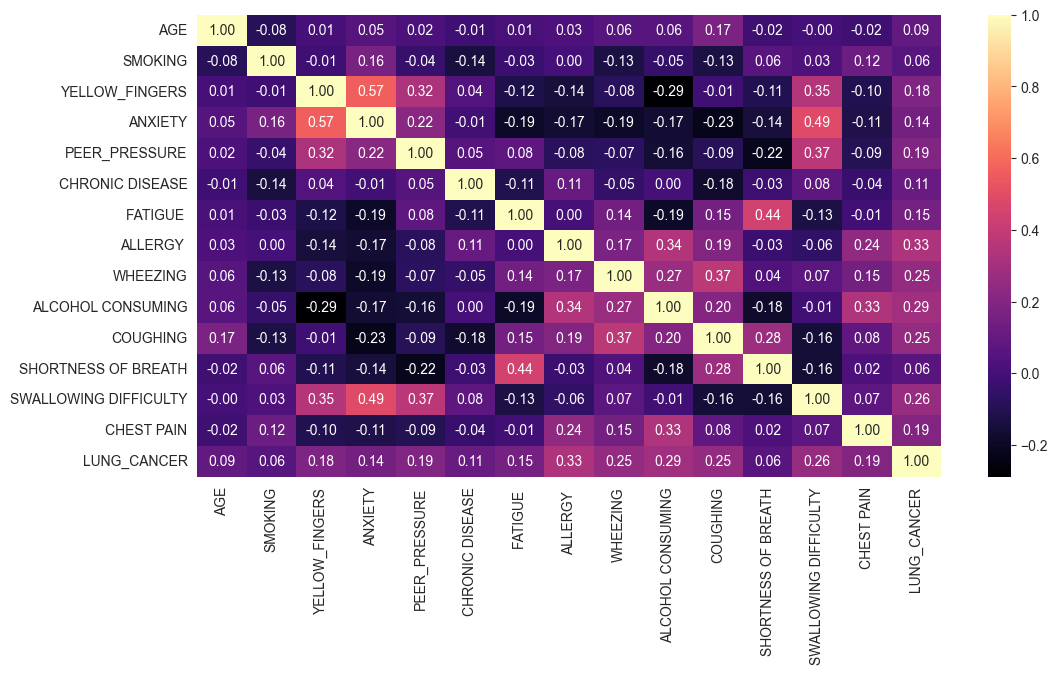

In [36]:
cor=df.select_dtypes(include="number").corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,fmt=".2f",annot=True,cmap="magma")
plt.show()

### `Average Age Of Smoking Addiction`

In [37]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [38]:
classifi_sm=df.groupby(["GENDER","SMOKING"])[ "AGE"].mean().reset_index()
classifi_sm

,GENDER,SMOKING,AGE
0,F,1,64.104478
1,F,2,61.137500
2,M,1,62.823529
3,M,2,62.851064


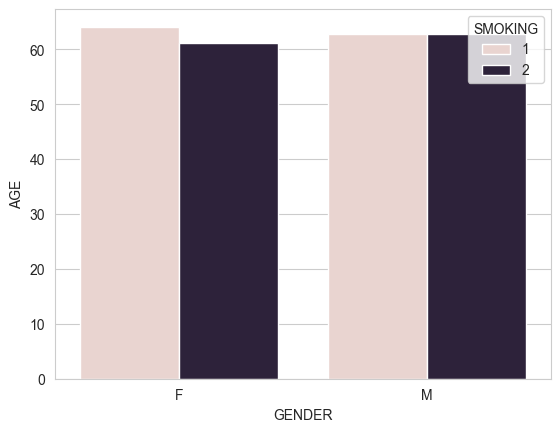

In [39]:
sns.set_style("whitegrid")
sns.barplot(data=classifi_sm,x="GENDER",y="AGE",hue="SMOKING")
plt.show()

In [40]:
classifi_al=df.groupby(["GENDER","ALCOHOL CONSUMING"])[ "AGE"].mean().reset_index()
classifi_al

,GENDER,ALCOHOL CONSUMING,AGE
0,F,1,61.990000
1,F,2,63.553191
2,M,1,62.513514
3,M,2,62.936000


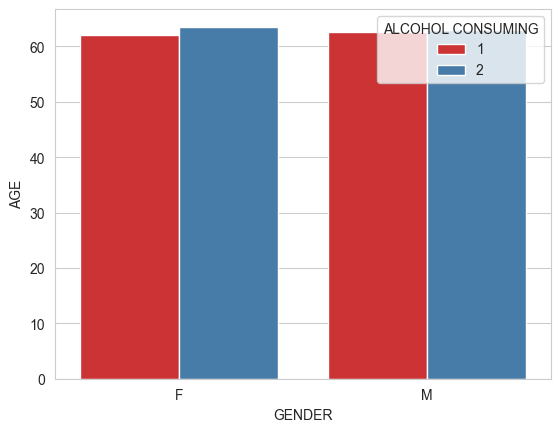

In [41]:
sns.set_style("whitegrid")
sns.barplot(data=classifi_al,x="GENDER",y="AGE",hue="ALCOHOL CONSUMING",palette="Set1")
plt.show()

## `Mental Pressure Classification`

### `Classification Of Average Age And Diesease Symptoms`

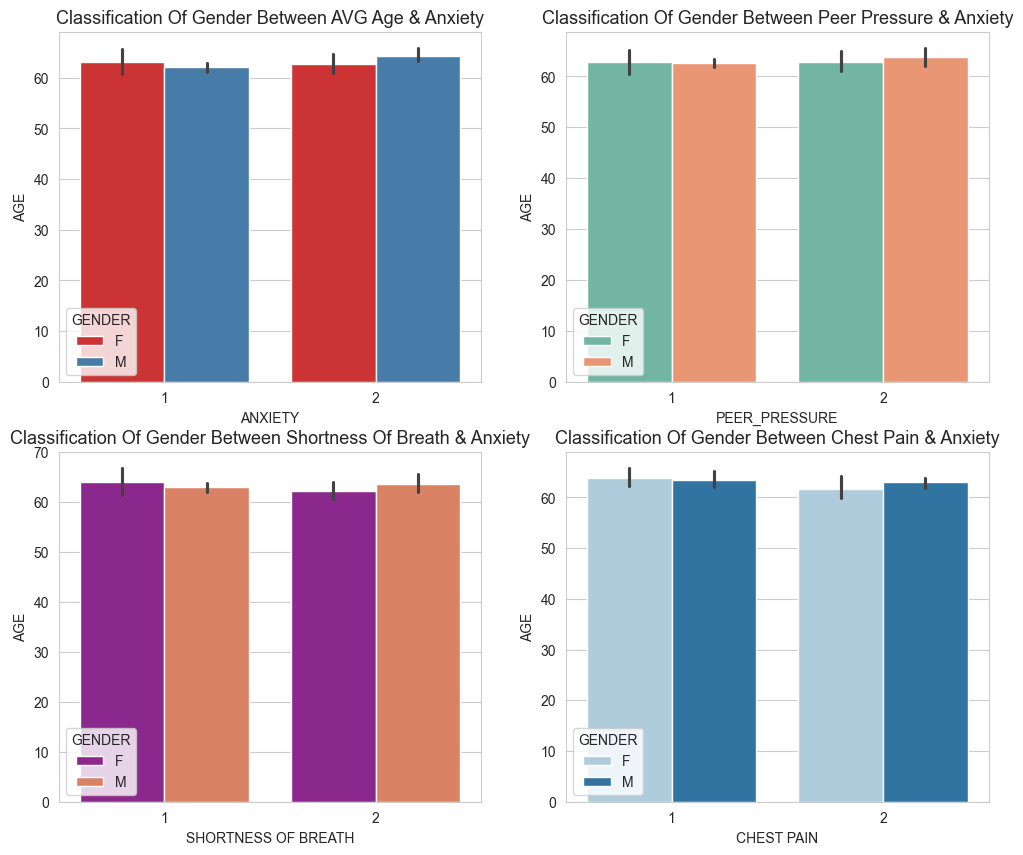

In [42]:
classifi_ag=df.groupby(["GENDER","ANXIETY","PEER_PRESSURE","SHORTNESS OF BREATH","CHEST PAIN"])["AGE"].mean().reset_index()
classifi_ag

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.barplot(data=classifi_ag,x="ANXIETY",y="AGE",hue="GENDER",palette="Set1")
plt.title("Classification Of Gender Between AVG Age & Anxiety",fontsize=13)

plt.subplot(2,2,2)
sns.barplot(data=classifi_ag,x="PEER_PRESSURE",y="AGE",hue="GENDER",palette="Set2")
plt.title("Classification Of Gender Between Peer Pressure & Anxiety",fontsize=13)

plt.subplot(2,2,3)
sns.barplot(data=classifi_ag,x="SHORTNESS OF BREATH",y="AGE",hue="GENDER",palette="plasma")
plt.title("Classification Of Gender Between Shortness Of Breath & Anxiety",fontsize=13)

plt.subplot(2,2,4)
sns.barplot(data=classifi_ag,x="CHEST PAIN",y="AGE",hue="GENDER",palette="Paired")
plt.title("Classification Of Gender Between Chest Pain & Anxiety",fontsize=13)
plt.show()

### `Alternate Visualization For Better Understanding`

<Axes: >

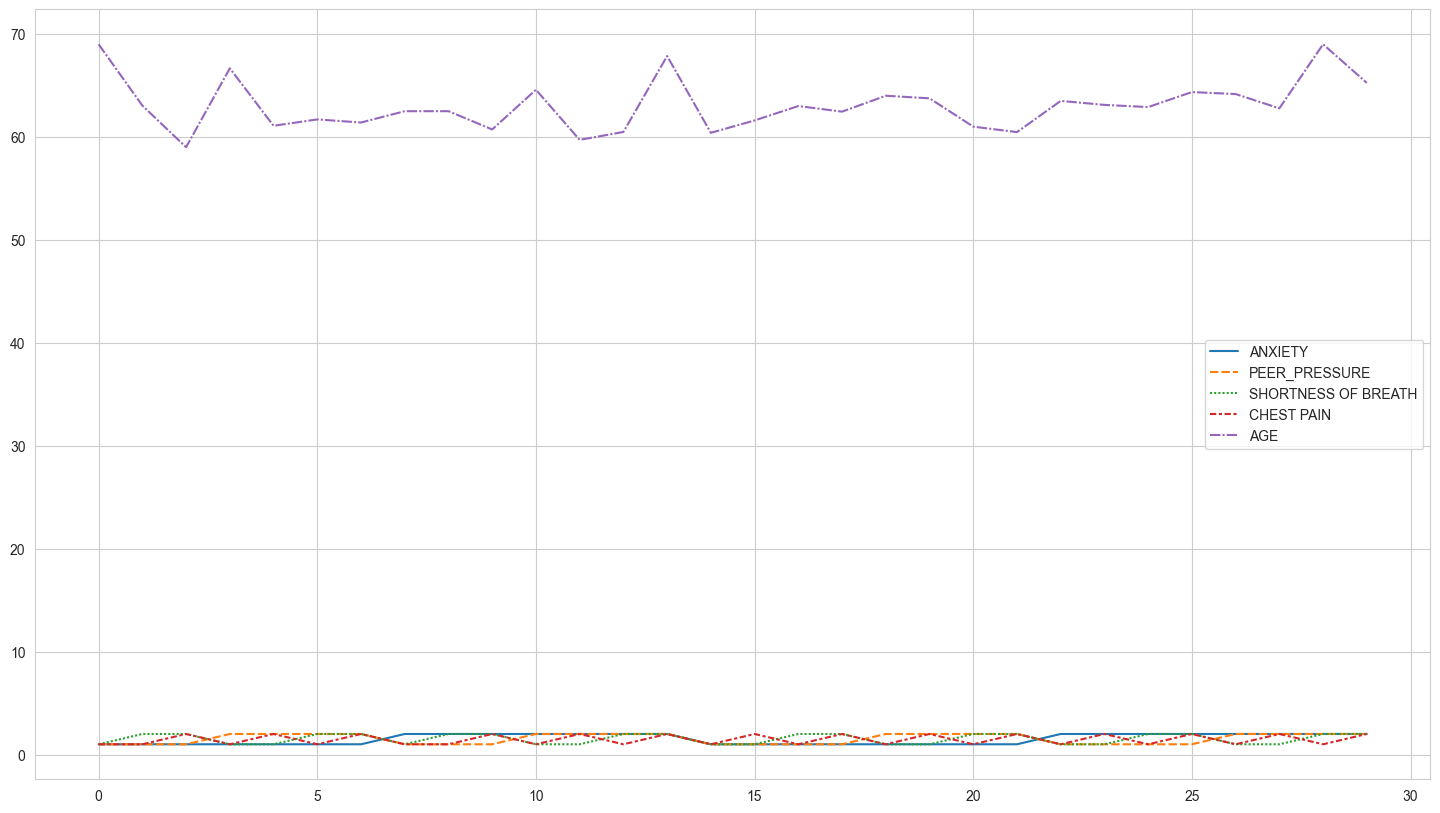

In [43]:
plt.figure(figsize=(18,10))
sns.lineplot(data=classifi_ag)

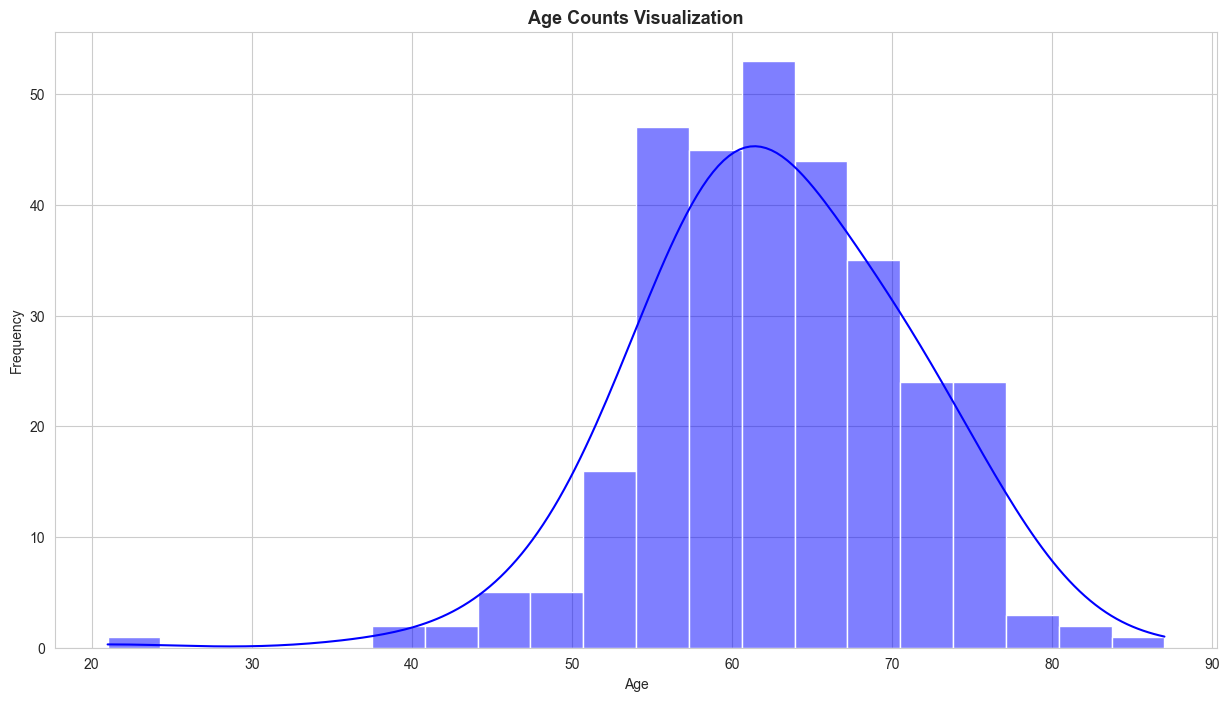

In [44]:
# Convert AGE column counts into DataFrame
age_count = df["AGE"].value_counts().reset_index()
age_count.columns = ["AGE", "Count"]  # Rename columns

plt.figure(figsize=(15,8))  

# Correct histplot usage
sns.histplot(data=age_count, x="AGE", weights="Count", bins=20,kde=True,color="blue")  # Adjust bins for better visualization

plt.title("Age Counts Visualization", fontsize=13,fontweight="bold")
plt.xlabel("Age",fontsize=10)
plt.ylabel("Frequency")
plt.show()

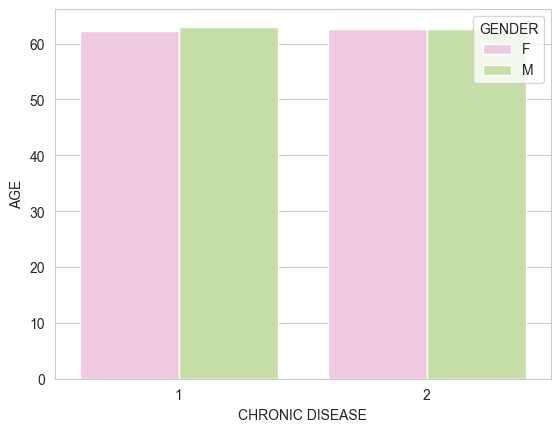

In [45]:
classifi_cr=df.groupby(["GENDER","CHRONIC DISEASE"])["AGE"].mean().reset_index()
classifi_cr
sns.barplot(data=classifi_cr,x="CHRONIC DISEASE",y="AGE",hue="GENDER",palette="PiYG")
plt.show()

## **<p style="color:#87CEEB;">🧠 Machine Learning Approach**

### **<p style="color:#E6E6FA;">🔧 Preprocessing**
##### <p style="color:#E6E6FA;"> Handled missing values and ensured all features were numeric.

##### <p style="color:#E6E6FA;">Label encoded the target variable LUNG_CANCER.

##### <p style="color:#E6E6FA;">Dropped non-informative columns such as GENDER (for modeling).

### **<p style="color:#E6E6FA;">📦 Model: Random Forest Classifier**
##### <p style="color:#E6E6FA;">Chosen for its ability to handle non-linear relationships and feature importance evaluation.

##### <p style="color:#E6E6FA;">Achieved high accuracy on test data (evaluation metrics included confusion matrix and classification report).

### **<p style="color:#E6E6FA;">📊 Feature Importance**
##### <p style="color:#E6E6FA;">The most influential predictors were:

##### <p style="color:#E6E6FA;">Smoking

##### <p style="color:#E6E6FA;">Chronic disease

##### <p style="color:#E6E6FA;">Shortness of breath

##### <p style="color:#E6E6FA;">Chest pain

##### <p style="color:#E6E6FA;">Peer pressure

In [46]:
target_column=df["LUNG_CANCER"]
x=df.drop(["LUNG_CANCER","GENDER"],axis=1)
y=df["LUNG_CANCER"]

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
#Training Model
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
#Predictions
y_pred=model.predict(x_test)

In [48]:
#Evaluation
print("\n--- Classification Report ---")
print(classification_report(y_test,y_pred))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))


--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62


--- Confusion Matrix ---
[[ 1  1]
 [ 0 60]]


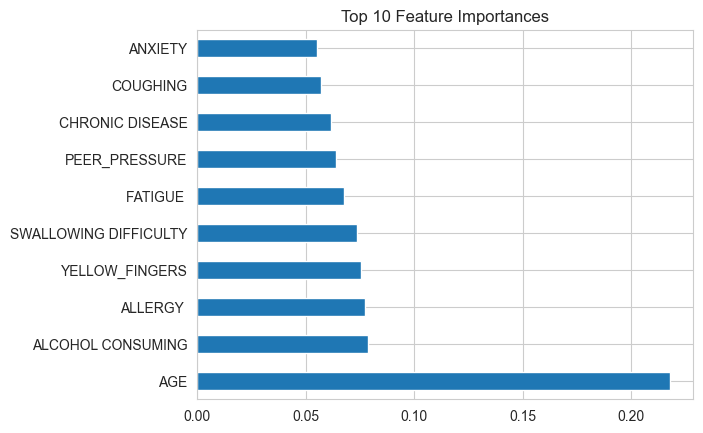

In [49]:
# Feature importance
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [50]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


## Predicting New Data & Result

In [51]:
new_data=(24,1,1,2,1,1,2,2,2,1,1,1,1,2)
arr=np.asarray(new_data)
reshape=arr.reshape(1,-1)
prediction=model.predict(reshape)

if (prediction[0]==0):
    print("The Person Is Healthy")
else:
    print("This Person Is Not Healthy")

This Person Is Not Healthy


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## **<p style="color:#87CEEB;">✅ Conclusion**

##### <p style="color:#E6E6FA;">This analysis not only helped identify key factors contributing to lung cancer risk but also demonstrated the power of combining EDA and machine learning in a real-world health context. The resulting model can serve as a foundational tool for early detection frameworks.

##### <p style="color:#E6E6FA;">🧩 What I Learned
The importance of thorough EDA in revealing hidden patterns

Responsible feature selection and encoding

Evaluating classification models for healthcare data

Communicating insights visually and effectively